In [7]:
import ephem
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [8]:
def calculate_sun_position(date, longitude, latitude):
    observer = ephem.Observer()
    observer.date = date
    observer.lon = str(longitude)
    observer.lat = str(latitude)
    sun = ephem.Sun(observer)
    return (float(sun.alt), float(sun.az))

In [9]:
def calculate_positions_for_years(year, longitude, latitude):
    data = []
    for i in range(10):
        current_year = year - i
        # for j in range(365):
        for j in range(1): # temporary
            for k in range(24*60):  # Iterate over each minute of the day
                date = datetime(current_year, 1, 1) + timedelta(days=j, minutes=k)
                alt, az = calculate_sun_position(date.strftime('%Y/%m/%d %H:%M:%S'), longitude, latitude)
                data.append([date, alt, az])
    df = pd.DataFrame(data, columns=['date', 'altitude', 'azimuth'])
    print(df.head())
    df.to_csv('dataset.csv', index=False)


In [10]:
calculate_positions_for_years(2022, -122.4194, 37.7749)  # Example for San Francisco

                 date  altitude   azimuth
0 2022-01-01 00:00:00  0.161536  4.035761
1 2022-01-01 00:01:00  0.158871  4.038778
2 2022-01-01 00:02:00  0.156200  4.041789
3 2022-01-01 00:03:00  0.153524  4.044791
4 2022-01-01 00:04:00  0.150842  4.047787


In [11]:
# Read the dataset
df = pd.read_csv('dataset.csv')
print(df.head())
# Convert the date to a datetime object
df['date'] = pd.to_datetime(df['date'])


                  date  altitude   azimuth
0  2022-01-01 00:00:00  0.161536  4.035761
1  2022-01-01 00:01:00  0.158871  4.038778
2  2022-01-01 00:02:00  0.156200  4.041789
3  2022-01-01 00:03:00  0.153524  4.044791
4  2022-01-01 00:04:00  0.150842  4.047787


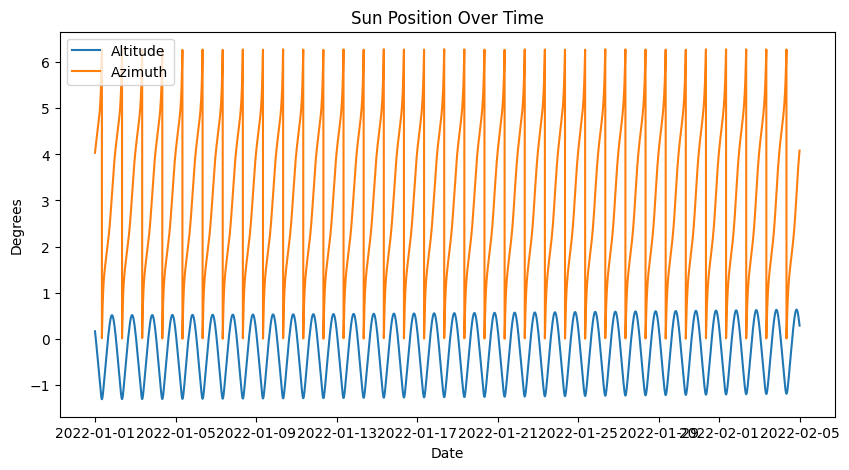

In [12]:

# Plot the altitude and azimuth over time
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['altitude'], label='Altitude')
plt.plot(df['date'], df['azimuth'], label='Azimuth')
plt.xlabel('Date')
plt.ylabel('Degrees')
plt.title('Sun Position Over Time')
plt.legend()
plt.show()